# Loading the Walmart  dataset and perform eda and future prediction


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wallmart.csv')

In [15]:
df.shape

(1000, 17)

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   str           
 1   Branch                   1000 non-null   str           
 2   City                     1000 non-null   str           
 3   Customer type            1000 non-null   str           
 4   Gender                   1000 non-null   str           
 5   Product line             1000 non-null   str           
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[us]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-null   str  

In [18]:
df.dtypes

Invoice ID                            str
Branch                                str
City                                  str
Customer type                         str
Gender                                str
Product line                          str
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[us]
Time                               object
Payment                               str
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [14]:
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28:00,Cash,618.38,4.761905,30.9190,6.6


In [21]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [24]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], dayfirst=True, errors='coerce')
walmart_df['Time'] = pd.to_datetime(walmart_df['Time'], format='%H:%M:%S', errors='coerce').dt.time
missing_counts = walmart_df.isna().sum().sort_values(ascending=False)
print(missing_counts)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


# EDA visuals: distributions, correlations, category impacts, and time trends

<Figure size 1200x700 with 0 Axes>

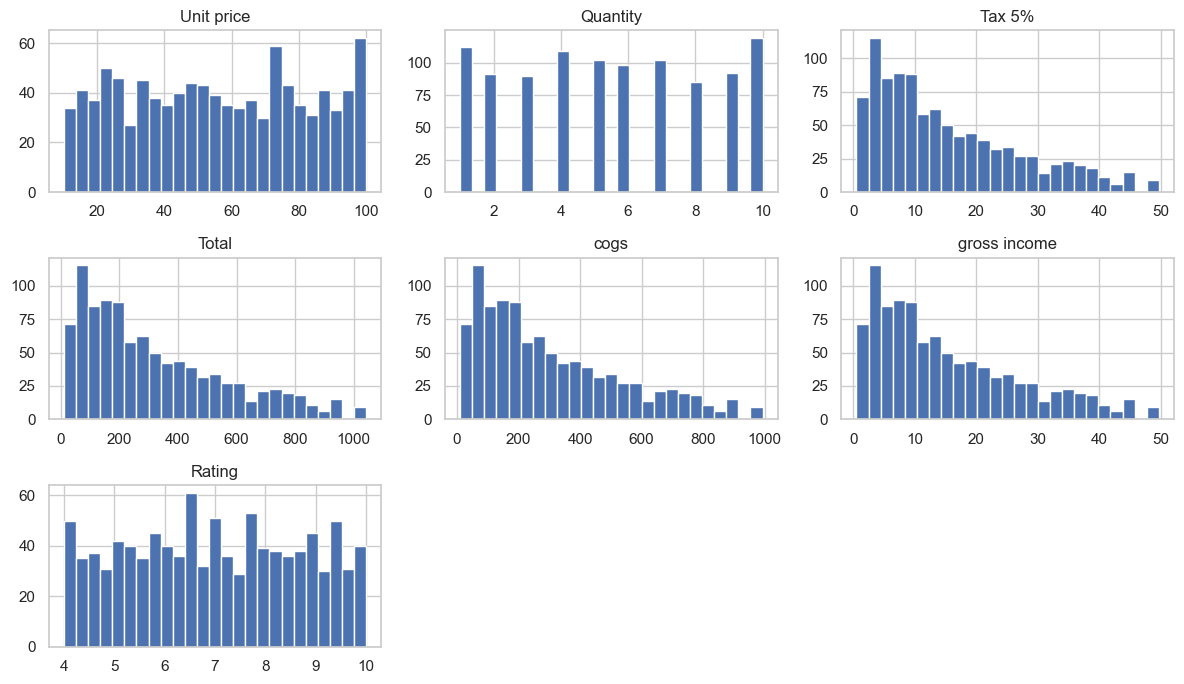

In [39]:
sns.set_theme(style='whitegrid')

# Basic numeric distributions
num_cols = ['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']
plt.figure(figsize=(12,7))
walmart_df[num_cols].hist(bins=25, figsize=(12,7), layout=(3,3))
plt.tight_layout()
plt.show()




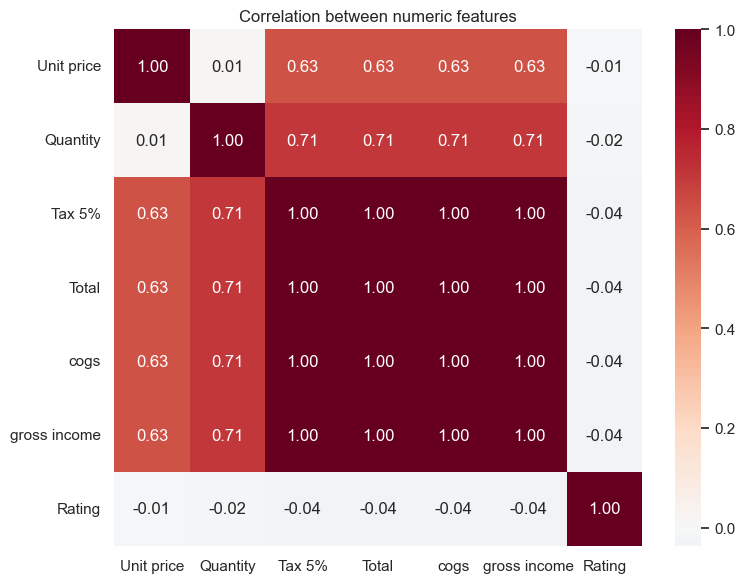

In [42]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr_mat = walmart_df[num_cols].corr(numeric_only=True)
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Correlation between numeric features')
plt.tight_layout()
plt.show()
plt.show()

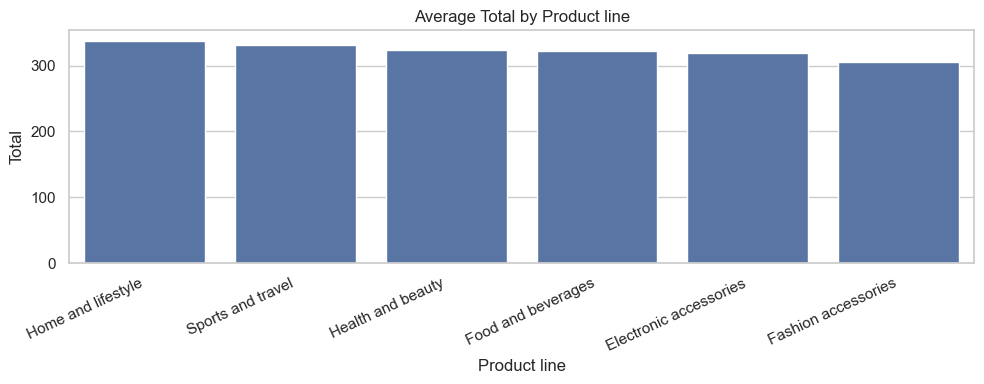

In [43]:
# Total by product line
plt.figure(figsize=(10,4))
order_pl = walmart_df.groupby('Product line')['Total'].mean().sort_values(ascending=False).index
sns.barplot(data=walmart_df, x='Product line', y='Total', order=order_pl, estimator=np.mean, errorbar=None)
plt.xticks(rotation=25, ha='right')
plt.title('Average Total by Product line')
plt.tight_layout()
plt.show()



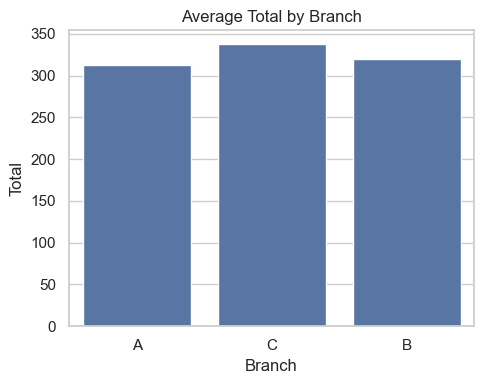

In [48]:
# Total by branch
plt.figure(figsize=(5,4))
sns.barplot(data=walmart_df, x='Branch', y='Total', estimator=np.mean, errorbar=None)
plt.title('Average Total by Branch')
plt.tight_layout()

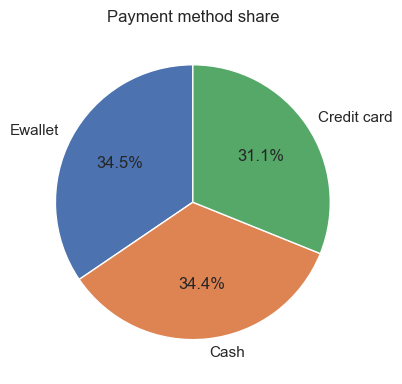

In [46]:
# Payment mix
plt.figure(figsize=(6,4))
pay_counts = walmart_df['Payment'].value_counts()
plt.pie(pay_counts.values, labels=pay_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment method share')
plt.tight_layout()
plt.show()

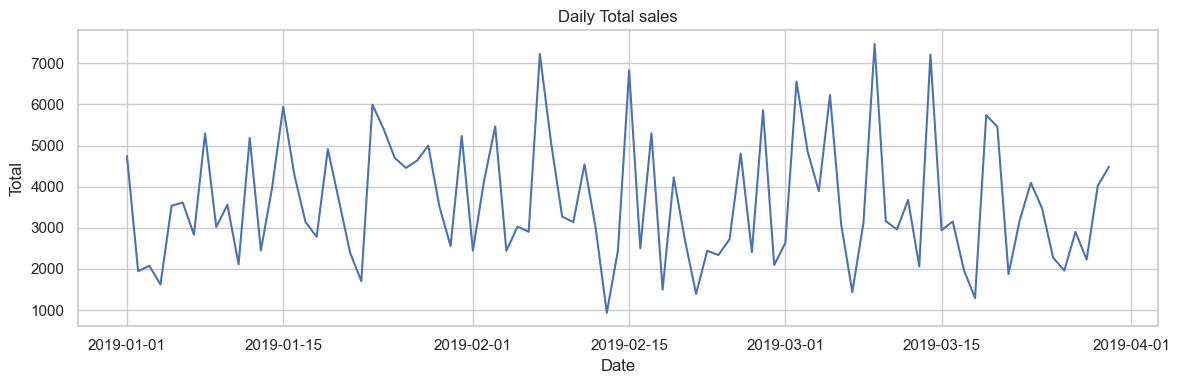

In [47]:
# Daily sales trend
daily_sales_df = walmart_df.groupby('Date', as_index=False)['Total'].sum().sort_values('Date')
plt.figure(figsize=(12,4))
sns.lineplot(data=daily_sales_df, x='Date', y='Total')
plt.title('Daily Total sales')
plt.tight_layout()
plt.show()
sns.set_theme(style='whitegrid')

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Aggregate daily sales
daily_sales_df = (
    walmart_df
    .groupby('Date', as_index=False)['Total']
    .sum()
    .sort_values('Date')
)

#  Feature Engineering
daily_sales_df['dayofweek'] = daily_sales_df['Date'].dt.dayofweek
daily_sales_df['month'] = daily_sales_df['Date'].dt.month
daily_sales_df['day'] = daily_sales_df['Date'].dt.day

daily_sales_df['lag_1'] = daily_sales_df['Total'].shift(1)
daily_sales_df['lag_7'] = daily_sales_df['Total'].shift(7)

daily_sales_df = daily_sales_df.dropna()

#  define X and y
X = daily_sales_df.drop(columns=['Date', 'Total'])
y = daily_sales_df['Total']

#   model selection
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

# model training
model.fit(X, y)

#  Predict on training data (demo purpose)
y_pred = model.predict(X)

# Evaluate
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)




MAE: 513.5601923780494
RMSE: 616.6721662184696


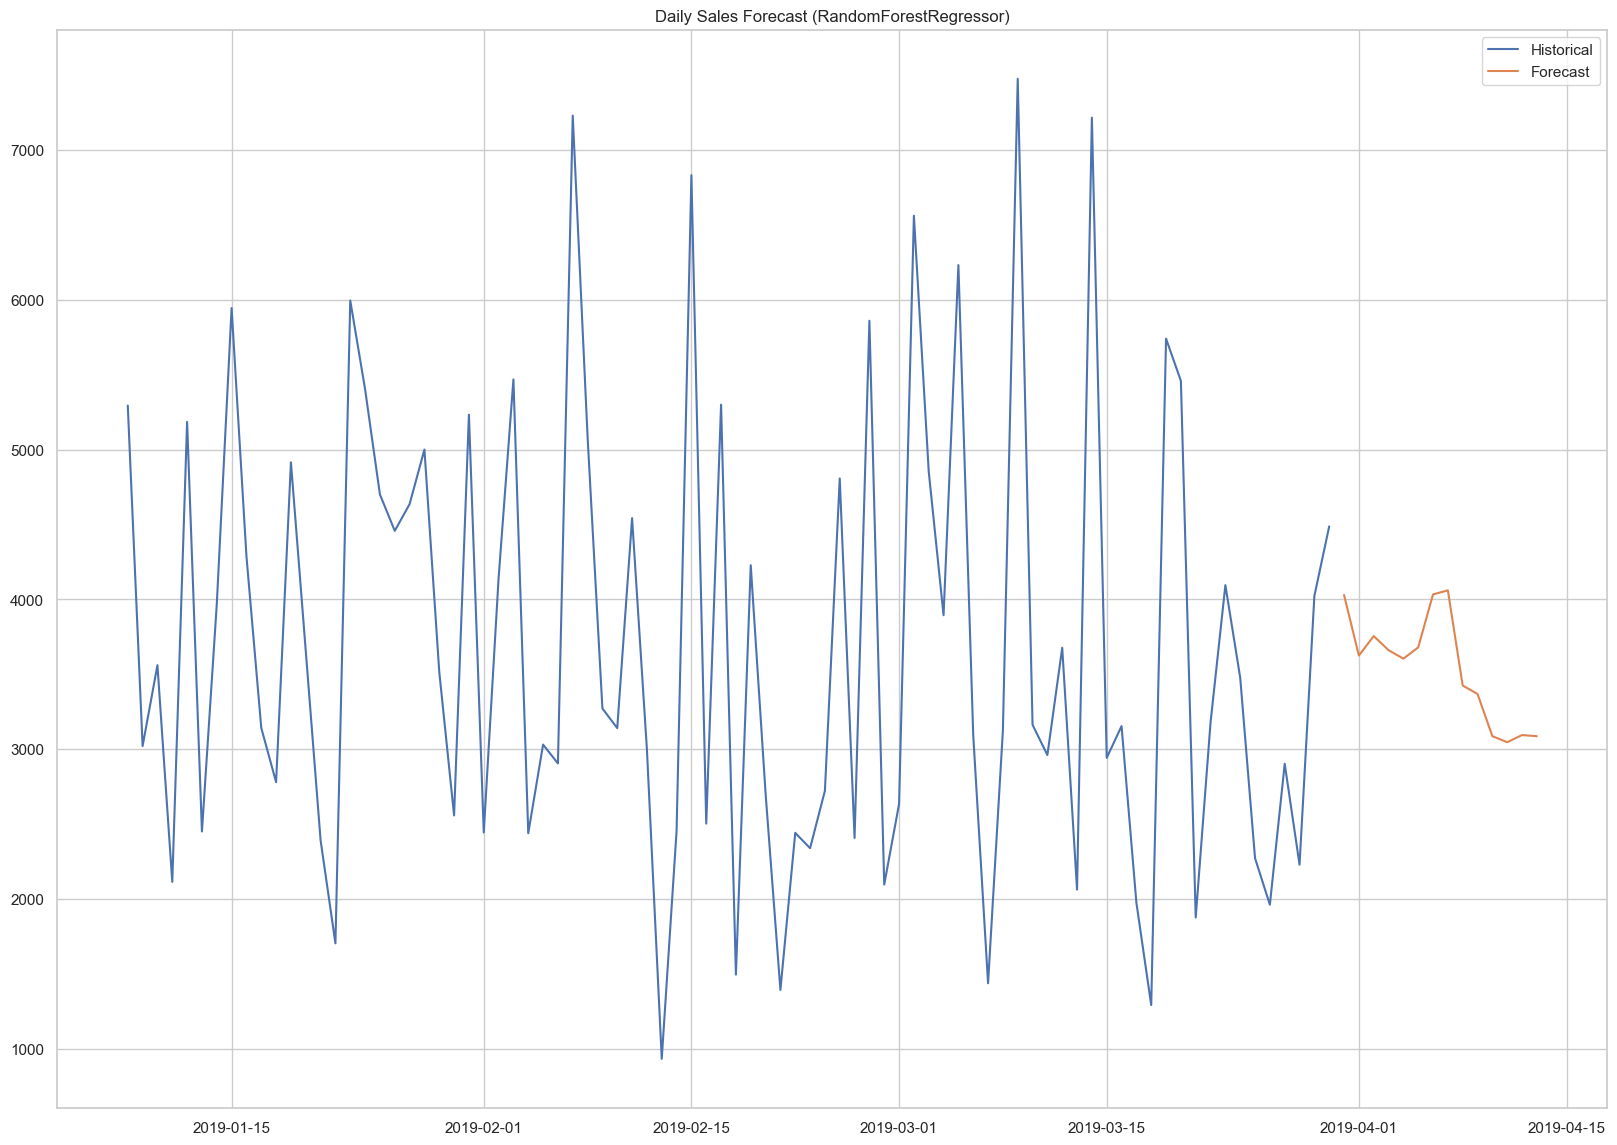

In [67]:
# 8️⃣ Visualization
plt.figure(figsize=(20, 14))
plt.plot(daily_sales_df['Date'], daily_sales_df['Total'], label='Historical')
plt.plot(future_df['Date'], future_df['Predicted_Total'], label='Forecast')
plt.legend()
plt.title("Daily Sales Forecast (RandomForestRegressor)")
plt.show()